# Load the data

In [111]:
import pandas as pd

completed_deals = pd.read_csv('../data/completed-or-current-deails-2019-10-29.csv')
lost_deals = pd.read_csv('../data/lost-deals-2019-10-28-1.csv')

completed_deals['Deal Stage'] = 1
lost_deals['Deal Stage'] = 0


# Concatenate lost and completed deals into 1 dataframe

In [112]:
deals_df = pd.concat([completed_deals, lost_deals], sort=False)

deals_df.tail()

,Deal ID,Deal Name,Deal owner,Deal Stage,Sales Lead,Designated Office,Director,Industry,Source,Associated Company ID,Associated Company,Associated Contact IDs,Associated Contacts,Business Lines
996,262701285,Crown Imports - Clone,Margaret Pagel,0,Paul Pagel,NaN,Doug Bradbury,NaN,NaN,701392159,Crown Imports,"215001, 215501","Mike Messina, Celine Kosian",Managed Services
997,262701284,IDEO - BMO - Plan B auth,Paul Pagel,0,Paul Pagel,Chicago,Gustin Prudner (Deactivated User),NaN,NaN,"726952002, 726952210","BMO Harris, Ascensia",NaN,NaN,Product Design and Delivery
998,262701281,Follett School Solutions,Margaret Pagel,0,NaN,NaN,NaN,NaN,NaN,727321304,Follett School Solutions,369625,"Welsh, Patrick",NaN
999,262701280,UBS,Margaret Pagel,0,Margaret Pagel,Chicago,NaN,NaN,NaN,727079967,UBS/ Tim Ryan,NaN,NaN,NaN
1000,262701271,Submarine Quest,Jim Suchy,0,NaN,London,Jim Suchy,NaN,NaN,726952036,Enigma Quests,NaN,NaN,Consulting


In [ ]:
#deals_df.to_csv('../data/all-deals.csv')

In [113]:
deals_single_company = deals_df.groupby('Associated Company')
deals_df = deals_single_company['Associated Company', 'Industry', 'Designated Office', 'Source', 'Deal owner', 'Deal Stage','Deal ID'].first()

In [65]:
deals_df['Deal owner'].value_counts()

Margaret Pagel                          289
Jim Suchy                                84
Jordan Koczot                            61
Paul Pagel                               52
Ray Hightower (Deactivated User)         47
Ryan Verner                              33
Dave Moore                               33
Malcolm Newsome                          27
Doug Bradbury                            24
Kim Carten                               18
Kevin Kotowski                           12
Jim Remsik (Deactivated User)            12
Connor Mendenhall (Deactivated User)     11
Brad Ediger                              10
Gustin Prudner (Deactivated User)        10
Gary Gentry (Deactivated User)            8
Dennis Moore                              8
Sarah Sunday                              5
heather corallo                           4
Connor Mendenhall                         4
Colin Jones                               3
Joseph Brown                              3
Nick Dyer                       

# Filter out outlayers

In [39]:
is_not_Margaret = ~(deals_df['Deal owner']=='Margaret Pagel')
deals_df = deals_df[is_not_Margaret]

deals_df.count()

Associated Company    506
Industry              184
Designated Office     431
Source                196
Deal owner            474
Deal Stage            506
dtype: int64

## And some empty data cleanup

In [85]:
df = deals_df[['Industry', 'Designated Office', 'Source', 'Deal owner', 'Deal Stage']].copy()

In [77]:
is_not_empty_industry = ~df['Industry'].isnull()

df = df[is_not_empty_industry]

df['Deal Stage'].value_counts()

0    127
1    107
Name: Deal Stage, dtype: int64

In [78]:
is_not_empty_office = ~df['Designated Office'].isnull()

df = df[is_not_empty_office]

df['Deal Stage'].value_counts()

0    126
1    107
Name: Deal Stage, dtype: int64

# Factorizing features

In [86]:
df['Source'].value_counts()

Existing client referral    65
Website                     62
Employee Referral           47
Referral                    43
Upsell                      21
Trade Show                   6
Extension                    5
Expansion                    5
Cold Call                    3
EO                           3
None                         1
Toll Free Number             1
Import                       1
Name: Source, dtype: int64

In [87]:
df['Industry'] = df['Industry'].factorize()[0]
df['Source'] = df['Source'].factorize()[0]
df['Designated Office'] = df['Designated Office'].factorize()[0]
df['Deal owner'] = df['Deal owner'].factorize()[0]

df.count()

Industry             795
Designated Office    795
Source               795
Deal owner           795
Deal Stage           795
dtype: int64

# Draw correlation

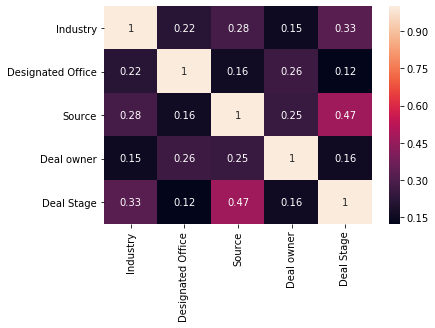

In [95]:
correlation = df.corr()

import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(correlation, annot=True)

## Heatmap fix
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()